In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [7]:
# read in data
data = pd.read_csv('NewYork.csv')

# data cleansing

(-1.1019296620684242,
 1.1089713385687547,
 -1.1215025656294224,
 1.1010239316966393)

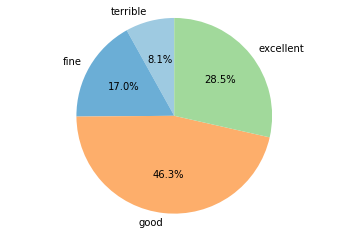

In [101]:
# pie
tmp  = data['review_scores_rating']
not_nan = tmp[tmp>0]
labels = 'terrible','fine','good','excellent'
terrible = len(tmp[tmp<=80])  # rate<=80
fine = len(tmp[tmp<=90])-terrible # 80 < rate <= 90
good = len(tmp[tmp<100]) - terrible - fine # 95 < rate < 100
excellent = len(tmp[tmp==100]) # rate = 100
sizes = [terrible, fine, good, excellent]
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([2, 1,6,10]))
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct = '%1.1f%%',shadow=False, startangle = 90,colors = colors)
ax1.axis('equal')

In [111]:
data.keys()

Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'reviews_per_month'],
      dtype='object')

TypeError: 'DataFrame' object is not callable